# Binomisk fordeling

Vi skal se hvordan vi kan regne ut og plotte punktsannsynligheter, kumulativ fordelingsfunksjon og kvantiler i binomisk fordeling. 

## Punktsannsynlighet 

La *X* være en diskret stokastisk variabel. *Punktsannsynligheten* er funksjonen som tar verdien *P*(*X* = *x*) i *x*.

Vi kan regne ut punktsannsynlighet i Python ved å bruke metoden `pmf` på en diskret stokastisk variabel.

La oss først anta at *X* er binomisk fordelt med parametre *n* = 15 og *p* = 0.3. Vi regner ut og plotter punktsannsynlighene. 

Vi har også regnet ut forventningsverdi, median, standardavvik og varians ved metodene `mean`, `median`, `std` og `var`.

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

valgtn=15
valgtp=0.5
print("Vi har valgt n {:.2f} og p {:.2f}".format(valgtn,valgtp))
      
X = stats.binom(n=valgtn, p=valgtp)  # X er nå en binomisk fordelt stokastisk variabel

print("Forventningsverdi {:.2f}, median {:.2f}, standardavvik {:.2f}, varians {:.2f}".format(
        X.mean(), X.median(), X.std(), X.var()))


Vi har valgt n 15.00 og p 0.50
Forventningsverdi 7.50, median 8.00, standardavvik 1.94, varians 3.75


Hvordan stemmer det med hva du lærte i forelesningene? Der så vi at forveningsverdien var $np$ og variansen $np(1-p)$ og standardavviket er kvadratroten av variansen. Vi så ikke på hva medianen i binomisk fordeling er.


Vi kan også skrive ut og plott punktsannsynlighetene.

Punktsannsynligheter
[3.05175781e-05 4.57763672e-04 3.20434570e-03 1.38854980e-02
 4.16564941e-02 9.16442871e-02 1.52740479e-01 1.96380615e-01
 1.96380615e-01 1.52740479e-01 9.16442871e-02 4.16564941e-02
 1.38854980e-02 3.20434570e-03 4.57763672e-04 3.05175781e-05]


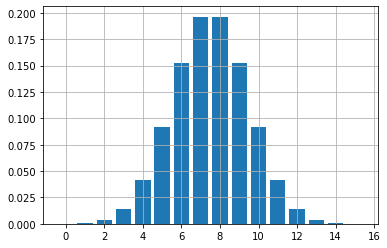

In [2]:
xverdier=range(0,valgtn+1)
print("Punktsannsynligheter")
print(X.pmf(xverdier))

fig, ax = plt.subplots()
ax.bar(xverdier, X.pmf(xverdier))
ax.grid()

## Kumulativ fordelingsfunksjon

*Kumulativ fordelingsfunksjon* til en stokastisk variabel *X* er definert ved at den i *x* tar verdien *P*(*X* ≤ *x*).  Merk at *P*(*a* < *X* ≤ *b*), som vi kan finne ved å summere punktsannsynligheter for diskrete variabler , også kan uttrykkes ved den kumulative fordelingsfunksjonen: *P*(*a* < *X* ≤ *b*) =  *P*(*X* ≤ *b*) − *P*(*X* ≤ *a*).

Vi kan regne ut kumulativ fordelingsfunksjon i Python ved å bruke metoden `cdf` på en stokastisk variabel.

For diskrete variabler (som binomisk fordeling) blir kumulativ fordelingsfunksjon en trappefunksjon. Vi tegner nå grafen til kumulativ fordelingsfunksjon for den binomisk fordelte *X* med parametre *n* = 15 og *p* = 0.5.

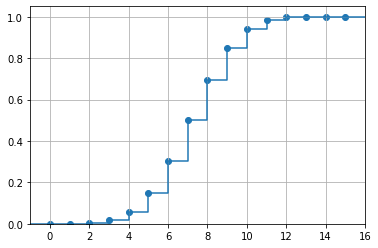

In [3]:
X = stats.binom(n=valgtn, p=valgtp)

xverdier = range(0,valgtn + 1)
xverdier_linje = range( - 1, valgtn+2)

fig, ax = plt.subplots()
ax.step(xverdier_linje, X.cdf(xverdier_linje), where="post")
ax.scatter(xverdier, X.cdf(xverdier))
ax.set_xlim(min(xverdier_linje), max(xverdier_linje))
ax.set_ylim(bottom=0)
ax.grid()

## Hjelp til oppgaver på øving 4

Her spør man etter punktsannsynlighet og kumulativ sannsynlighet i binomisk fordeling. Alle studenter har fått litt ulike verdier av

$n$: antall forsøk
$p$: suksessansynligheten
$k$: verdien du skal finne sannsynligheten for, eller sannsynligheten for å være mindre eller større enn

La oss anta at du har fått oppgitt at $n=12$, $p=0.6$ og $k=3$, og la oss sette dem som variabler:

In [4]:
import numpy as np
from scipy import stats

valgtn=12
valgtp=0.6
valgtk=3
print("Du velger n= {:.2f}, p= {:.2f}  og k= {:.2f}".format(valgtn,valgtp,valgtk))

X = stats.binom(n=valgtn, p=valgtp)  # X er nå en binomisk fordelt stokastisk variabel

Du velger n= 12.00, p= 0.60  og k= 3.00


## Punktsannsynlighet

Hvis du har blitt bedt om å finne sannsynligheten for at den stokastiske variablen er lik $k$ regner du det slik:


In [5]:
print(X.pmf(valgtk))

0.012457082879999996


## Sannsynlighet for mindre, mindre eller lik, større, større eller lil

Her er det lurt å tegne seg en tall-linje med tallene rundt $k$ og tenke godt over hvordan man kan skrive om det man blir spurt om til sannsynlighet for å være mindre eller lik et tall - fordi det er det den kumulative fordelingen sier.

### Sannsynlighet for å være mindre eller lik et tall $k$

Hvis du har blitt bedt om å finne sannsynligheten for at den stokastiske variablen er mindre eller lik $k$ regner du slik:


In [6]:
print(X.cdf(valgtk))

0.01526726656000001


### Sannsynlighet for å være mindre enn et tall $k$

Hvis det heller var mindre enn $k$ så betyr det mindre eller lik $k-1$, og da må du heller regne ut

In [7]:
print(X.cdf(valgtk-1))

0.00281018368


### Sannsynlighet for å være større enn et tall $k$

Fra uke 2 husker vi at sannsynlighet for komplmentet til en hendelse er 1 minus sannsynligheten for hendelsen, så $P(X>k)=1-P(X\le k)$ og det kan du bruke til å regne ut sannsynlighet for større enn et tall.

In [8]:
print(1-X.cdf(valgtk))

0.98473273344


### Sannsynlighet for å være større eller lik enn et tall $k$

Da må vi bruke $P(X\ge k)=1-P(X\le k-1)$ og regne

In [9]:
print(1-X.cdf(valgtk-1))

0.99718981632


## Forveningsverdi, varians, standardavvik og median

Vi har formler for forventningsverdi, varians og standardavvik, og kan regne dette uten bruk av Python (eller med Python som i forklaringen på toppen av denne notebooken), men for median har vi ikke noen enkel formel i pensum.


In [10]:
print(X.median())

7.0
